In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal
import ENDF6

In [2]:
import ENDF6el as endfel

f = endfel.fetch_elastic(filename='xn_data/si28_el.txt')
print(f([0.896,1.0,1.158,1.542]))

[2.88760675 4.67949255 1.60752601 2.46483739]


In [3]:
(en,al)=endfel.fetch_elastic_angular('xn_data/n-014_Si_028.endf')

In [4]:
dsdomeg=endfel.fetch_diff_xn(En=0.04e6)
dsdomegv=np.vectorize(dsdomeg)

dsdomeg1=endfel.fetch_diff_xn(En=0.896e6)
dsdomeg1v=np.vectorize(dsdomeg1)

dsdomeg2=endfel.fetch_diff_xn(En=1.158e6)
dsdomeg2v=np.vectorize(dsdomeg2)

dsdomeg3=endfel.fetch_diff_xn(En=1.542e6)
dsdomeg3v=np.vectorize(dsdomeg3)

dsdomeg4=endfel.fetch_diff_xn(En=1e6)
dsdomeg4v=np.vectorize(dsdomeg4)

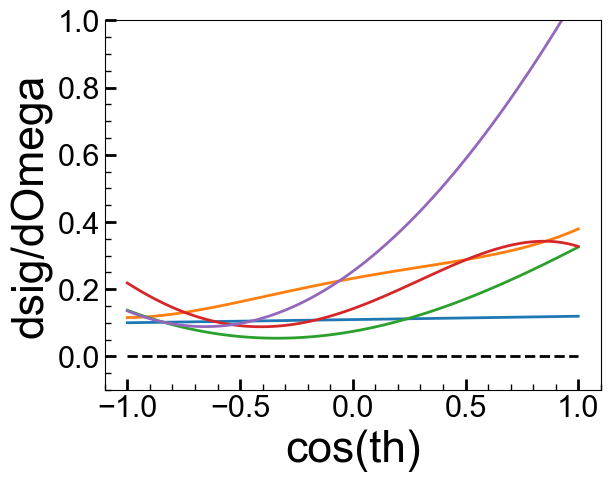

In [6]:
#plot quick
from pylab import *
ct = np.linspace(-1.0,1.0,100)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(ct, dsdomegv(ct))
plot(ct, dsdomeg1v(ct))
plot(ct, dsdomeg2v(ct))
plot(ct, dsdomeg3v(ct))
plot(ct, dsdomeg4v(ct))
ax1.hlines(0,-1,1,'k',linestyle='--')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylim(-0.1,1.0)
xlabel('cos(th)')
ylabel('dsig/dOmega')
show()